Y-DATA 2020/21<br/>
Deep Learning HW2<br/>
Serge Tochilov

# Theoretical Aspects of Deep Learning

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn
%matplotlib inline

Much of the power of neural networks comes from the nonlinearity that is introduced by activation functions. Show that a $N$-layer neural network with a linear activation function is equivalent to a neural network with just an input and output layers.

>Answer:

Let's consider a linear NN with one hidden layer. Let $\mathbf{x}$ and $\mathbf{y}$ be input and output vectors, $W_h$ and $W_o$ − hidden layer and output weight matrices, $\mathbf{b}_h$ and $\mathbf{b}_o$ − hidden layer and output bias vectors, and hidden layer activation function be vector linear function $f(\mathbf{a})=\mathbf{a}K+\mathbf{m}$. Then

$$
\begin{array}{}
    \mathbf{y}= & f(\mathbf{x}W_h + \mathbf{b}_h)W_o + \mathbf{b}_o = \\
    & (\mathbf{x} W_h K + \mathbf{b}_h K + \mathbf{m})W_o + \mathbf{b}_o = \\
    & \mathbf{x} W_h K W_o + \mathbf{b}_h K W_o + \mathbf{m} W_o + \mathbf{b}_o
\end{array}
$$

which is just a vector linear function of the input. In such a way, any linear NN with $N$ layers can be reduced to a linear NN with $N-1$ layers, and, by induction, to just input and output.

### Derivatives of Activation Functions
Compute the derivatives of these activation functions:

1. Sigmoid
$$f(t)=\dfrac{1}{1+e^{-t}}$$

>Answer:
$$f'(t)=-\dfrac{d(1+e^{-t})/dt}{(1+e^{-t})^2}=-\dfrac{e^{-t}d(-t)/dt}{(1+e^{-t})^2}=\dfrac{e^{-t}}{(1+e^{-t})^2}$$

2. ReLU

$$f(x)=max(x,0)$$

>Answer:

The ReLU function can be expressed as
$$
f(x)=\left\{
    \begin{array}{}
        0 & if\ \ x<0\\
        x & if\ \ x\ge0\\
    \end{array}
  \right..
$$
Then 
$$
f'(x)=\left\{
    \begin{array}{}
        0 & if\ \ x<0\\
        1 & if\ \ x>0\\
    \end{array}
  \right.=\large{𝟙}(x),$$
  
where $\large{𝟙}(x)$ is Heaviside step function. $f'(0)$ can be chosen to be $0$ or $1$.

3. Softmax
$$\sigma_j(\mathbf{z})=\dfrac{e^{z_j}}{\sum^K_{k=1}e^{z_k}}$$

>Answer:

Let
$$S=\sum^K_{k=1}e^{z_k}.$$

Then
$$\dfrac{\partial\sigma_j(\mathbf{z})}{\partial z_i}=\dfrac{\dfrac{\partial e^{z_j}}{\partial z_i}S-\dfrac{\partial S}{\partial z_i}e^{z_j}}{S^2}.$$

For $i=j$

$$\dfrac{\partial\sigma_j(\mathbf{z})}{\partial z_j}=\dfrac{e^{z_j}S-e^{z_j}e^{z_j}}{S^2}=\dfrac{e^{z_j}(S-e^{z_j})}{S^2}=\dfrac{e^{z_j}}{S}\dfrac{S-e^{z_j}}{S}=\sigma_j(\mathbf{z})\big(1-\sigma_j(\mathbf{z})\big),$$

for $i\ne j$

$$\dfrac{\partial\sigma_j(\mathbf{z})}{\partial z_i}=\dfrac{0\ S-e^{z_i}e^{z_j}}{S^2}=-\dfrac{e^{z_i}}{S}\dfrac{e^{z_j}}{S}=-\sigma_i(\mathbf{z})\ \sigma_j(\mathbf{z}),$$

so for any $i$
$$\dfrac{\partial\sigma_j(\mathbf{z})}{\partial z_i}=\sigma_j(\mathbf{z})\big(\delta_{ij}-\sigma_i(\mathbf{z})\big),$$

where $\delta_{ij}$ is Kroneker delta.


## Back Propagation
Use the delta rule and backpropagation to compute the partial derivatives $\dfrac{\partial z}{\partial x_i}$ for these functions:

1. $z=x_1+5x_2-3x_3^2$

*Answer:*

$$\begin{array}{}
    \dfrac{\partial z}{\partial x_1}=1\\
    \dfrac{\partial z}{\partial x_2}=5\\
    \dfrac{\partial z}{\partial x_3}=-6x_3
\end{array}{}$$

2. $z=x_1(x_2-4)+\dfrac{e^{x_3^2}}{5x_4^2}$

*Answer*

$$\begin{array}{}
    \dfrac{\partial z}{\partial x_1}=x_2-4\\
    \dfrac{\partial z}{\partial x_2}=x_1\\
    \dfrac{\partial z}{\partial x_3}=\dfrac{2x_3\ e^{x_3^2}}{5x_4^2}\\
    \dfrac{\partial z}{\partial x_4}=-\dfrac{2 e^{x_3^2}}{5x_4^3}
\end{array}{}$$

3. $z=\dfrac{1}{x_3}+e^{(x_1+5(x_2+3))^2}$

>Answer:

Equivalently
$$z=\dfrac{1}{x_3}+e^{(x_1+5x_2+15)^2},$$
and
$$\begin{array}{}
    \dfrac{\partial z}{\partial x_1}=2\ e^{(x_1+5x_2+15)^2}(x_1+5x_2+15)\\
    \dfrac{\partial z}{\partial x_2}=10\ e^{(x_1+5x_2+15)^2}(x_1+5x_2+15)\\
    \dfrac{\partial z}{\partial x_3}=-\dfrac{1}{x_3^2}
\end{array}{}$$

## Gradient Checking
When computing the gradient yourself, it's recommended to manually check the gradient to make sure you haven't made an error. We'll use the following equation for this, which produces more robust results than the standard definition of a derivative:

$$\dfrac{d}{d\boldsymbol{\overline{\theta}}}J(\boldsymbol{\overline{\theta}})=\lim_{\epsilon\ \rightarrow\ 0}\dfrac{J(\boldsymbol{\overline{\theta}}+\boldsymbol{\epsilon})-J(\boldsymbol{\overline{\theta}}-\boldsymbol{\epsilon})}{2\boldsymbol{\epsilon}}$$

We'll numerically approximate it using:

$$\dfrac{d}{d\boldsymbol{\overline{\theta}}}J(\boldsymbol{\overline{\theta}})\simeq\dfrac{J(\boldsymbol{\overline{\theta}}+\boldsymbol{\epsilon})-J(\boldsymbol{\overline{\theta}}-\boldsymbol{\epsilon})}{2\boldsymbol{\epsilon}}$$

Write a function that evaluates the gradient locally and use it to numerically compute the gradient along several randomly chosen dimensions. Compare your results with your analytically computed gradient. The numbers should match almost exactly along all dimensions.

>Answer:

Let $\epsilon$ be a small positive number, i.e.

$$0<\epsilon\ll1\ .$$
Then
$$\dfrac{\partial}{\partial\theta_j}J(\boldsymbol{\overline{\theta}})\simeq\dfrac{J(\boldsymbol{\overline{\theta}}+\epsilon\ \mathbf{\hat{e}_j})-J(\boldsymbol{\overline{\theta}}-\epsilon\ \mathbf{\hat{e}_j})}{2\epsilon}$$
where $\mathbf{\hat{e}_j}$ is a basis vector for dimension $j$.

Next we compute true and approximated gradient for the function #2.

In [ ]:
import numpy as np

EPS = 1e-4

def z2(x):
    return x[0] * (x[1] - 4) + np.exp(np.square(x[2]))/(5 * np.square(x[3]))

def dza_dx(x, dim):
    if dim == 0:
        return x[1] - 4
    elif dim == 1:
        return x[0]
    elif dim == 2:
        return 2 * x[2] * np.exp(np.square(x[2]))/(5 * np.square(x[3]))
    elif dim == 3:
        return - 2 * np.exp(np.square(x[2]))/(5 * np.power(x[3], 3))
    raise ValueError('Only dimensions 0-3 supported')


def grad(f, x, dim, eps):

    # store x[dim] to modify it inplace
    x_dim = x[dim]

    x[dim] = x_dim + eps
    f_hi = f(x)

    x[dim] = x_dim - eps
    f_lo = f(x)

    # restore x[dim]
    x[dim] = x_dim

    return 0.5 * (f_hi - f_lo) / eps


x = np.array([1., 2., 3., 4.])
for d in range(4):
    true = dza_dx(x, d)
    approx = grad(z2, x, d, EPS)
    print(f'dim {d}, true grad: {true:.5f}, true-approximation difference: {true-approx:.5e}')

dim 0, true grad: -2.00000, true-approximation difference: 6.63931e-11
dim 1, true grad: 1.00000, true-approximation difference: -3.31966e-11
dim 2, true grad: 607.73129, true-approximation difference: -4.25424e-05
dim 3, true grad: -50.64427, true-approximation difference: 6.33011e-08


We see that the approximation is rather precise for all dimensions.

## Puppy or bagel?
We saw in the class some (hopefully) funny examples of challenging images (Chihuahua or muffin, puppy or bagel etc.).

Suppose you were asked to find more such examples. You are able to run 3 neural networks that won the recent ImageNet challenges, and get their predictions (the entire vector of probabilities for 1000 classes). Describe methods that you might employ.

> Answer:

We may undertake the following procedure:
- Compile an image dataset that contains as diverse set of images as possible
- Compute predictions from all 3 NNs and their class confusion matrix $C$
- In the confusion matrix find classes with high level of mutual misclassification in all NNs, i.e., classes $i,j$ having both $C_{i,j}$ and $C_{j,i}$ higher than average, and these are classes that the NNs tend to mix with each other, independently of NNs' architecture

## Sample convolutions
Consider the following convolution filters:

In [ ]:
k1 = np.array(
    [[0, 0, 0],
     [0, 1, 0],
     [0, 0 ,0]])
k2 = np.array(
    [[0, 0, 0],
     [0, 0, 1],
     [0, 0, 0]])
k3 = np.array(
    [[-1, -1, -1],
     [-1, +8, -1],
     [-1, -1, -1]])
k4 = np.array(
    [[1, 1, 1],
     [1, 1, 1],
     [1, 1, 1]]) / 9

Can you guess what each of them computes?

>Answer:

- k1: repeat array
- k2: shift array by $1$ pixel left
- k3: Laplacian filter, edge detection
- k4: averaging (smoothing)

#### Apply to arrays
Apply the convolutions above to the following array:


>Answer:

We perform the convolution with zero padding and stride $1$.

In [ ]:
x = np.array(
    [[-1, -3, -4,  0, -1],
     [ 2, -2, -4,  0, -2],
     [-3, -2,  2,  2,  3],
     [ 0, -3, -4, -4, -2],
     [-4, -2,  2,  0,  1]])

def convolve(x, flt):
    f_s = flt.shape[0]
    f_d = f_s // 2
    n_rows = x.shape[0]
    n_cols = x.shape[1]
    tmp = np.zeros((n_rows + f_d*2, n_cols + f_d*2), dtype=np.float)
    tmp[f_d:-f_d, f_d:-f_d] = x
    res = np.empty_like(x, dtype=np.float)
    for j in range(n_rows):
        for i in range(n_cols):
            res[j, i] = np.sum(flt * tmp[j:j+f_s, i:i+f_s])
    return res

print('k1:\n', convolve(x, k1))
print('\nk2:\n', convolve(x, k2))    
print('\nk3:\n', convolve(x, k3))
print('\nk4:\n', convolve(x, k4))

k1:
 [[-1. -3. -4.  0. -1.]
 [ 2. -2. -4.  0. -2.]
 [-3. -2.  2.  2.  3.]
 [ 0. -3. -4. -4. -2.]
 [-4. -2.  2.  0.  1.]]

k2:
 [[-3. -4.  0. -1.  0.]
 [-2. -4.  0. -2.  0.]
 [-2.  2.  2.  3.  0.]
 [-3. -4. -4. -2.  0.]
 [-2.  2.  0.  1.  0.]]

k3:
 [[ -5. -15. -23.  11.  -6.]
 [ 27.  -3. -25.   4. -20.]
 [-19.  -4.  33.  27.  30.]
 [ 14. -13. -27. -36. -18.]
 [-27.  -7.  29.   7.  14.]]

k4:
 [[-4.44444444e-01 -1.33333333e+00 -1.44444444e+00 -1.22222222e+00
  -3.33333333e-01]
 [-1.00000000e+00 -1.66666667e+00 -1.22222222e+00 -4.44444444e-01
   2.22222222e-01]
 [-8.88888889e-01 -1.55555556e+00 -1.66666667e+00 -1.00000000e+00
  -3.33333333e-01]
 [-1.55555556e+00 -1.55555556e+00 -1.00000000e+00  0.00000000e+00
   5.55111512e-17]
 [-1.00000000e+00 -1.22222222e+00 -1.22222222e+00 -7.77777778e-01
  -5.55555556e-01]]


### Apply convolution to images
Apply the convolution filters discussed above to an image. Plot the results.

>Answer:

We use "Stream and bridge" USC SIPI test image, as use of the historical "Lenna" test image has been discouraged for ethical reasons.


Original image


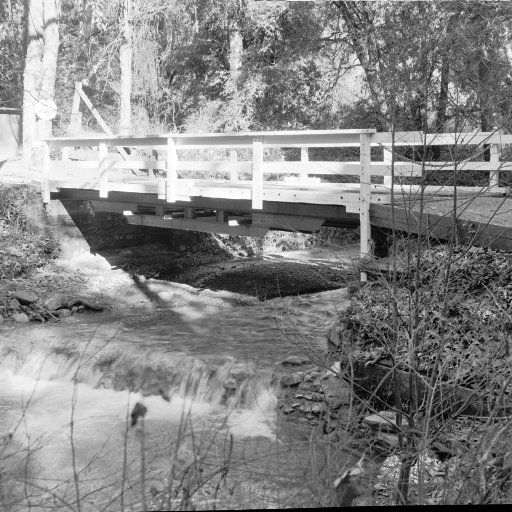


k1 filter


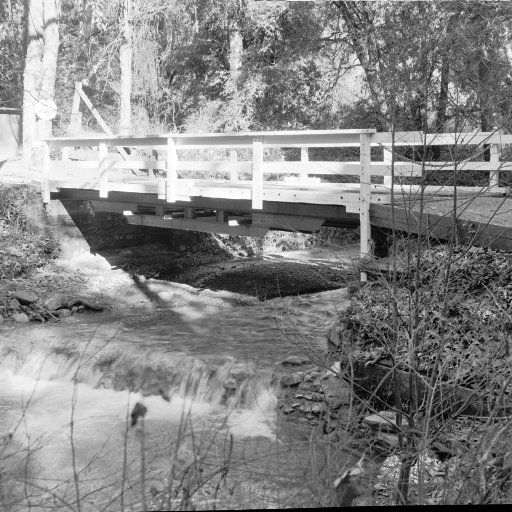


k2 filter


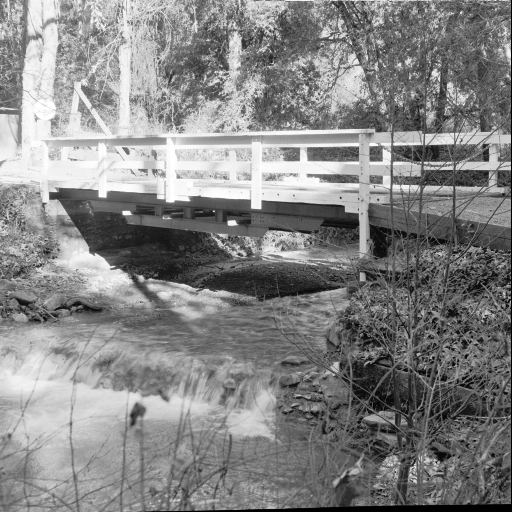


k3 filter


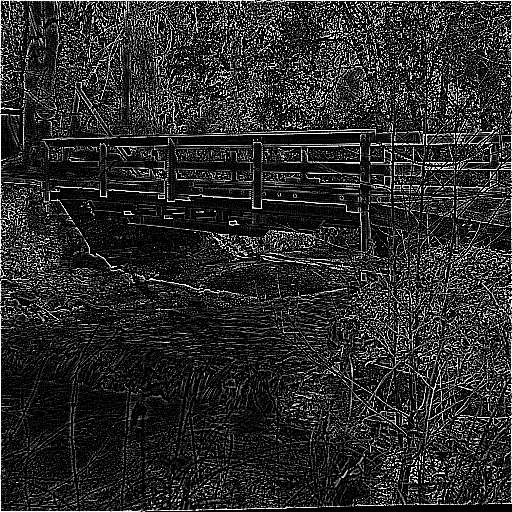


k4 filter


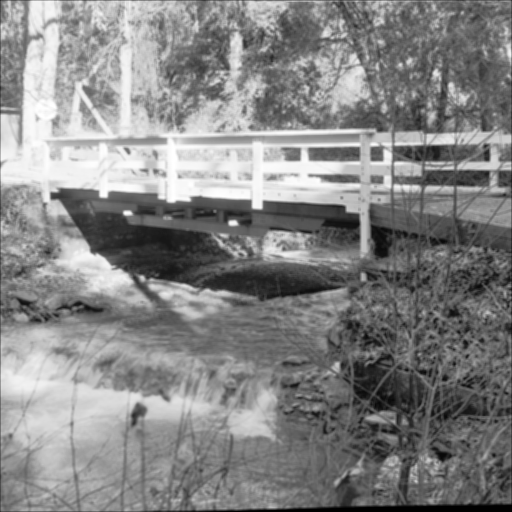

In [ ]:
import matplotlib.pyplot as plt
from skimage import io


def show_image(image, vmin=0, vmax=255, text=''):
    print()
    print(text)
    dpi = 1
    fig, ax = plt.subplots(figsize=(image.shape[0]/dpi, image.shape[1]/dpi), dpi=dpi)
    fig.subplots_adjust(left=0, bottom=0, top=1, right=1)
    ax.axis('off')
    plt.imshow(image, interpolation='none', vmin=vmin, vmax=vmax, cmap='Greys_r')
    plt.show()


# "Stream and bridge" USC SIPI test image #5.2.10, 512x512, 8-bit grayscale
mandrill_url = 'http://sipi.usc.edu/database/download.php?vol=misc&img=5.2.10'
image = io.imread(mandrill_url, format='tiff')
show_image(image, text='Original image')

show_image(convolve(image, k1), text='k1 filter')
show_image(convolve(image, k2), text='k2 filter')
show_image(convolve(image, k3), text='k3 filter')
show_image(convolve(image, k4), text='k4 filter')

Note that the second (k2-filtered) image is discernibly shifted to the left with respect to k1-image, and in the subsequent images k3 (edge highlighting) and k4 (smoothing) effects are evident.

## Following Week 3
**(Note: We'll learn the material needed to complete this section on Week 3)**

What would be the output dimensions in these cases?
1. No padding, stride of 1
1. No padding, stride of 2
1. Zero padding, stride of 1
1. Zero padding, stride of 2

Consider convolutions with kernels of size 3x3, 5x5, 7x7 etc.

Come up with an equation for the dimension of the output image after a convolution layer. Your equation should also take into account padding and the stride.

>Answer:

Let the kernel size be $d$

$$d:\ d\ge3,\ d\ \mathrm{mod}\ 2=1\ ,$$

the input array size be $(i_1\times i_2)$, and the stride $s$

$$s:\ s\in\{1,2\}$$

be equal in both dimensions. In the zero paddind case the output size is

$$(o_1\times o_2)_{zero\_pad}:\ o_j=i_j\ \mathrm{div}\ s + i_j\ \mathrm{mod}\ s;\ j\in\{1,2\}.$$

In the no-padding case the input size in every dimension is effectively lower than with the zero-padding by $d-1$ so

$$(o_1\times o_2)_{no\_pad}:\ o_j=(i_j-d+1)\ \mathrm{div}\ s + (i_j-d+1)\ \mathrm{mod}\ s;\ j\in\{1,2\}.$$

Additionally, the no-padding case has constraints on the input size vs kernel size

$$(i_1\times i_2)_{no\_pad}:\ min(i_1,\ i_2)\ge d\ .$$



In [ ]:
def stable_div(v, d):
    return v // d + v % d

def dim_zero_pad(i1, i2, s, sd=0):
    if s not in (1,2):
        return 'Only strides 1 and 2 are supported'
    return stable_div(i1-sd, s), stable_div(i2-sd, s)

def dim_no_pad(i1, i2, s, d):
    if d % 2 != 1:
        return 'Kernel size must be odd'
    if d > min(i1, i2):
        return 'Kernel size can\'t be larger than any dimension'
    return dim_zero_pad(i1, i2, s, sd=d-1)

for d in range(3, 9, 2):
    for i in range(1, 10):
        for s in range(1, 3):
            print(f'Kernel size {d}, {i}x{i} array, stride {s}')
            print('Zero padding:', dim_zero_pad(i, i, s))
            print('No-padding:', dim_no_pad(i, i, s, d))
            print()

Kernel size 3, 1x1 array, stride 1
Zero padding: (1, 1)
No-padding: Kernel size can't be larger than any dimension

Kernel size 3, 1x1 array, stride 2
Zero padding: (1, 1)
No-padding: Kernel size can't be larger than any dimension

Kernel size 3, 2x2 array, stride 1
Zero padding: (2, 2)
No-padding: Kernel size can't be larger than any dimension

Kernel size 3, 2x2 array, stride 2
Zero padding: (1, 1)
No-padding: Kernel size can't be larger than any dimension

Kernel size 3, 3x3 array, stride 1
Zero padding: (3, 3)
No-padding: (1, 1)

Kernel size 3, 3x3 array, stride 2
Zero padding: (2, 2)
No-padding: (1, 1)

Kernel size 3, 4x4 array, stride 1
Zero padding: (4, 4)
No-padding: (2, 2)

Kernel size 3, 4x4 array, stride 2
Zero padding: (2, 2)
No-padding: (1, 1)

Kernel size 3, 5x5 array, stride 1
Zero padding: (5, 5)
No-padding: (3, 3)

Kernel size 3, 5x5 array, stride 2
Zero padding: (3, 3)
No-padding: (2, 2)

Kernel size 3, 6x6 array, stride 1
Zero padding: (6, 6)
No-padding: (4, 4)

Kern

## Network dimensions
Write below the dimensions and number of parameters in each layer of this network for the MNIST data:

- Convolutional Layer #1: Applies 32 5x5 filters (extracting 5x5-pixel subregions), with ReLU activation function
- Pooling Layer #1: Performs max pooling with a 2x2 filter and stride of 2 (which specifies that pooled regions do not overlap)
- Convolutional Layer #2: Applies 64 5x5 filters, with ReLU activation function
- Pooling Layer #2: Again, performs max pooling with a 2x2 filter and stride of 2
- Dense Layer #1: 1,024 neurons, with dropout regularization rate of 0.4 (probability of 0.4 that any given element will be dropped during training)
- Dense Layer #2 (Logits Layer): 10 neurons, one for each digit target class (0–9).


>Answer:

The MNIST dataset has $28$⨯$28$ grayscale image size, so the layer parameters, assuming padding, are
- Input layer: dimensions $1$⨯$28$⨯$28$
- Convolutional Layer #1 ($32\ 1$⨯$5$⨯$5$ kernels): dimensions $32$⨯$28$⨯$28$, $832$ parameters
- Pooling Layer #1 ($2$⨯$2$, stride $2$): dimensions $32$⨯$14$⨯$14$
- Convolutional Layer #2 ($64\ 32$⨯$5$⨯$5$ kernels): dimensions $64$⨯$14$⨯$14$, $51264$ parameters
- Pooling Layer #2 ($2$⨯$2$, stride $2$): dimensions $64$⨯$7$⨯$7$
- Dense Layer #1: $1024$ neurons, $3212288$ parameters
- Dense Layer #2: $10$ neurons, $10250$ parameters